# 多项式回归

尽管有些数据我们可以线性表示，但很多时候，我们可能会遇到无法使用线性方程去拟合的数据。因此可是使用多项式回归。

多项式回归中，加入了特征的更高次方（例如平方项或立方项），也相当于增加了模型的自由度，用来捕获数据中非线性的变化。添加高阶项的时候，也增加了模型的复杂度。随着模型复杂度的升高，模型的容量以及拟合数据的能力增加，可以进一步降低训练误差，但导致过拟合的风险也随之增加。


对于一元m次多项式回归方程，令：

$
x_1=x, x_2=x^2,\cdots x_m=x^m
$


则该一元m次多项式就转化为m元线性回归方程：

$
\hat y = b_0+b_1x+b_2x^2+\cdots+b_mx^m
$

因此，用多元线性函数的回归方法就可解决多项式回归问题。需要指出的是，在多项式回归分析中，检验回归系数是否显著，实质上就是判断自变量x的i次方项对因变量y的影响是否显著。

# sklearn中的多项式回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 生成模拟数据
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [12]:
# PolynomialFeatures 为数据添加特征
from sklearn.preprocessing import PolynomialFeatures

In [13]:
# degree 表示为数据添加几次幂的特征
poly = PolynomialFeatures(degree=2)
# 训练数据
poly.fit(X)
# 转换为包含多项式特征的数据
X2 = poly.transform(X)

In [14]:
X2.shape

(100, 3)

In [15]:
X2[:5,:]

array([[ 1.        ,  0.50288676,  0.25289509],
       [ 1.        , -2.18468188,  4.7728349 ],
       [ 1.        ,  2.77180326,  7.68289332],
       [ 1.        , -0.39454123,  0.15566278],
       [ 1.        ,  2.88570818,  8.32731168]])

In [16]:
X[:5,:]

array([[ 0.50288676],
       [-2.18468188],
       [ 2.77180326],
       [-0.39454123],
       [ 2.88570818]])

In [17]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X2, y)

y_predict = lin_reg.predict(X2)

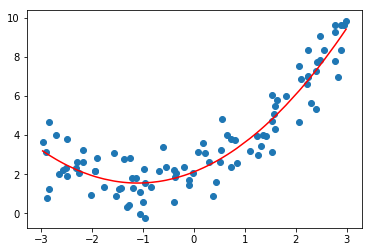

In [19]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [22]:
# 系数
lin_reg.coef_

array([ 0.        ,  1.03618097,  0.46957639])

# pipeline

In [23]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [24]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

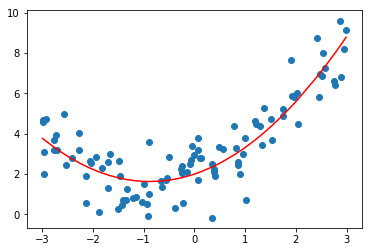

In [26]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()